# Project - 4 - Advanced Lane Lines

Due Date: January 24th, 2017

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

print('Imports successful.')

Imports successful.


## Calibration


In [2]:
# Load all the calibration images and convert to gray scale.

directory = "CarND-Advanced-Lane-Lines/camera_cal/"

imgfilenames = sorted(os.listdir(directory))
pixelh = 720
pixelw = 1280

cal_images_gray = np.zeros( [len(imgfilenames), pixelh, pixelw], dtype='uint8')
for num, name  in enumerate(imgfilenames):
    
    # Calibration images 07 and 15 have an extra height and width pixel for some reason.
    if num == 6 or num == 14:
        imgtemp = cv2.cvtColor(mpimg.imread(directory + name), cv2.COLOR_RGB2GRAY) 
        cal_images_gray[num] = imgtemp[1:721, 1:1281]
        continue
    
    cal_images_gray[num] = cv2.cvtColor(mpimg.imread(directory + name), cv2.COLOR_RGB2GRAY)
    print(name)


calibration01.jpg
calibration02.jpg
calibration03.jpg
calibration04.jpg
calibration05.jpg
calibration06.jpg
calibration08.jpg
calibration09.jpg
calibration10.jpg
calibration11.jpg
calibration12.jpg
calibration13.jpg
calibration14.jpg
calibration16.jpg
calibration17.jpg
calibration18.jpg
calibration19.jpg
calibration20.jpg


In [3]:
# Find Chessboard corners.

objpoints = [] 
imgpoints = []

objp = np.zeros((9*6,3), np.float32)
#print(np.mgrid[0:8,0:6])
#print('\n')
#print(np.mgrid[0:8, 0:6].T.reshape(-1,2))
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
#print(objp)

for i in range(20):
    image = cal_images_gray[i]
    ret, corners = cv2.findChessboardCorners(image, (9,6), None)
    print(str(i) + ': '+ str(ret))
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        image = cv2.drawChessboardCorners(image, (9,6), corners, ret)
        plt.imshow(image)


0: False
1: True
2: True
3: True
4: False
5: True
6: True
7: True
8: True
9: True
10: True
11: True
12: True
13: True
14: True
15: True
16: True
17: True
18: True
19: True


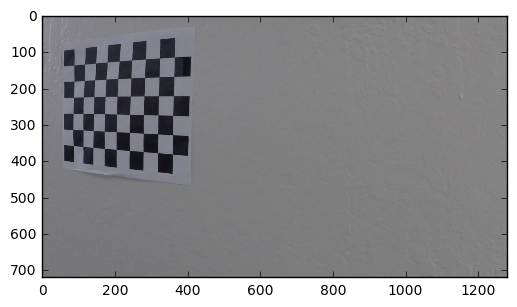

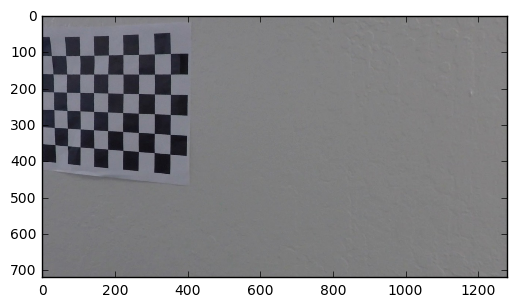

In [10]:
def img_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Must read image using mpimg.imread
    
    output = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    undist = cv2.undistort(img, output[1], output[2], None, output[1])
    return undist

disimage = mpimg.imread(directory + imgfilenames[18])
plt.imshow(disimage)
plt.show()

undistort = img_undistort(disimage, objpoints, imgpoints)
plt.imshow(undistort)
plt.show()

## Undistort Test Images

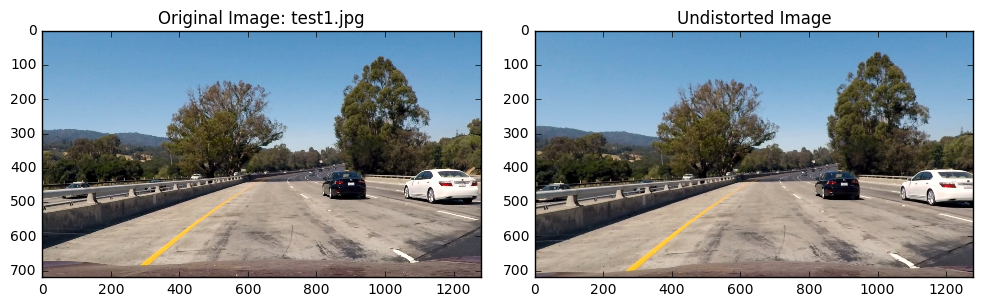

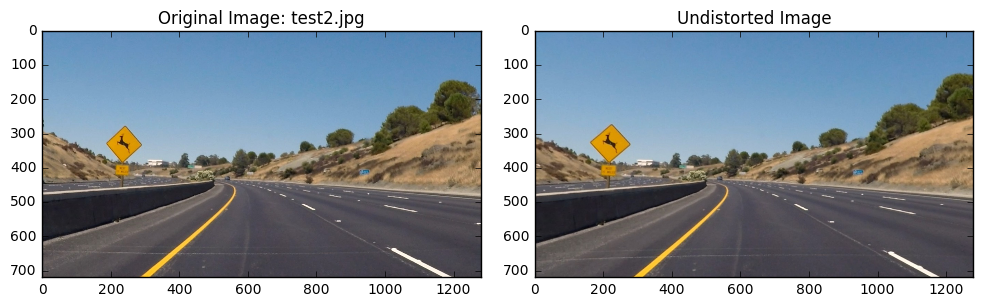

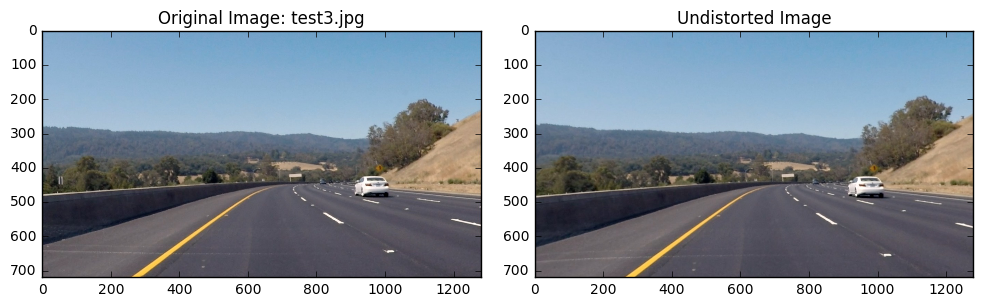

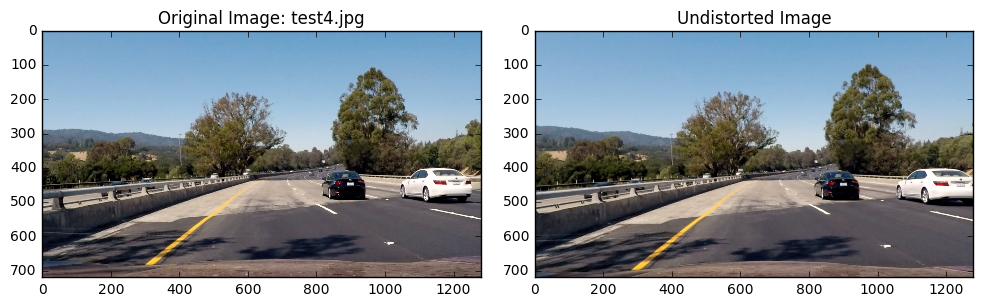

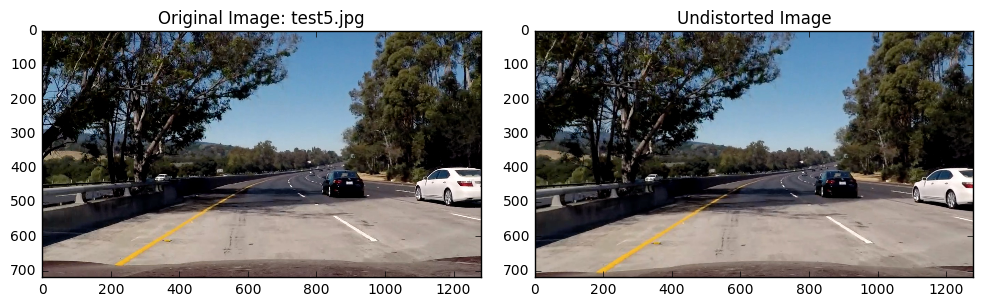

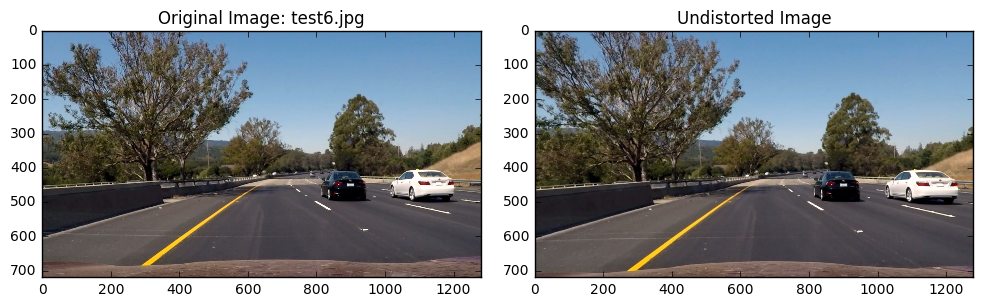

In [46]:
directory = "CarND-Advanced-Lane-Lines/test_images/"

imgfilenames = sorted(os.listdir(directory))

undist_test = []

for imgname in imgfilenames:
    
    f, (p1, p2) = plt.subplots(1, 2, figsize=(10, 5))
    f.tight_layout()
    
    disimage = mpimg.imread(directory + imgname)
    p1.imshow(disimage)
    p1.set_title('Original Image: ' + imgname)
    
    undistort = img_undistort(disimage, objpoints, imgpoints)
    undist_test.append(undistort)
    p2.imshow(undistort)
    p2.set_title('Undistorted Image')
    plt.show()

undist_test = np.asarray(undist_test)